In [3]:
import pandas as pd
import numpy as np

In [4]:
print(pd.date_range('2021-11-01',periods=10,freq="BM"))

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-29', '2022-05-31', '2022-06-30',
               '2022-07-29', '2022-08-31'],
              dtype='datetime64[ns]', freq='BM')


In [8]:
"""
Frequencies and Offsets
"""

pd.date_range('2021-11-01',periods=10,freq='M')

DatetimeIndex(['2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31'],
              dtype='datetime64[ns]', freq='M')

In [10]:
#월초
pd.date_range('2021-11-01',periods=10,freq='MS')

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [12]:
pd.date_range('2021-11-01',periods=10,freq='2H30T')

DatetimeIndex(['2021-11-01 00:00:00', '2021-11-01 02:30:00',
               '2021-11-01 05:00:00', '2021-11-01 07:30:00',
               '2021-11-01 10:00:00', '2021-11-01 12:30:00',
               '2021-11-01 15:00:00', '2021-11-01 17:30:00',
               '2021-11-01 20:00:00', '2021-11-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [14]:
#오프셋을 이용해서 타임스탬프 계산
from pandas.tseries.offsets import DateOffset
ts=pd.Timestamp('2021-10-30 23:28:30')
ts+DateOffset(hours=40)

Timestamp('2021-11-01 15:28:30')

In [16]:
ts-DateOffset(years=71,month=4,days=5,hours=19,minutes=28,seconds=30)

Timestamp('1950-04-25 04:00:00')

In [12]:
#야후 파이넌스부터 구글 주가 데이터 불러오기
from pandas_datareader import data

goog=data.DataReader('GOOG',start='2004',end='2021',data_source='yahoo')

goog=goog['Close']
print(goog)
print(type(goog))

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2020-12-24    1738.849976
2020-12-28    1776.089966
2020-12-29    1758.719971
2020-12-30    1739.520020
2020-12-31    1751.880005
Name: Close, Length: 4122, dtype: float64
<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='Date'>

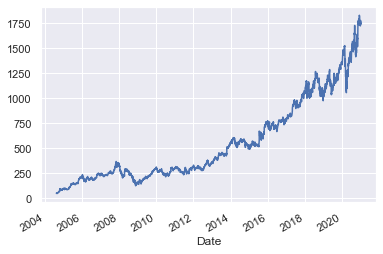

In [17]:
goog.plot()
#2021년은 마무리가 안되서 2020년도까지

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
%config InlineVackend.figure_format='svg'


In [22]:
#resampling
#분기별 평균값 (다운샘플링)
goog.resample('Q').mean()
#중앙값 다운샘플링
goog.resample('Q').median()
#시간별데이터로 업샘플링
goog.resample('H').max()


Date
2004-08-19 00:00:00      49.982655
2004-08-19 01:00:00            NaN
2004-08-19 02:00:00            NaN
2004-08-19 03:00:00            NaN
2004-08-19 04:00:00            NaN
                          ...     
2020-12-30 20:00:00            NaN
2020-12-30 21:00:00            NaN
2020-12-30 22:00:00            NaN
2020-12-30 23:00:00            NaN
2020-12-31 00:00:00    1751.880005
Freq: H, Name: Close, Length: 143473, dtype: float64

<ipython-input-30-43fb585beb03>:9: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


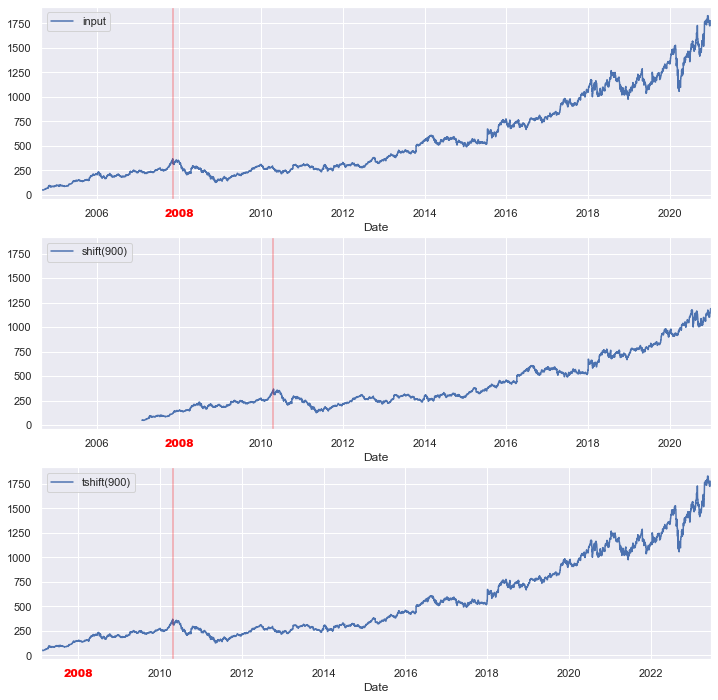

In [30]:
#구글 900일만큼 쉬프팅하기
fig,ax=plt.subplots(3,sharey=True,figsize=(12,12))

#구굴의 값이 일별데이터라는걸 알려줌
goog=goog.asfreq('D',method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max=pd.to_datetime('2007-11-05')
offset=pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.3,color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy',color='red')
ax[1].axvline(local_max+offset,alpha=0.3,color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy',color='red')
ax[2].axvline(local_max+offset,alpha=0.3,color='red')

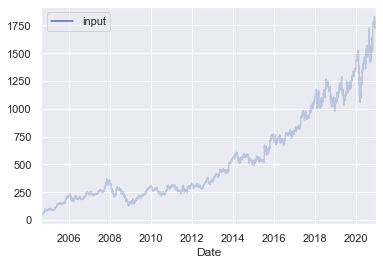

In [34]:
rolling=goog.rolling (365,center=True)

data=pd.DataFrame({'input':goog,'one-year rolling_mean':rolling.mean,
                  'one_year rolling_std':rolling.std})
ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)